In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("H:\Downloads\Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# ***Understanding The Data***

In [4]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
df.shape

(541909, 8)

In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

# ***Data Cleaning***

In [10]:
# Check presence of duplicates
df.duplicated().sum()

np.int64(5268)

In [11]:
# Removing the duplicates
df = df.drop_duplicates()

In [12]:
# Ensure zero duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
# Check presence of missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [14]:
# Check presence of missing values in percentage
df.isnull().sum() / len(df) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

In [15]:
# Filling missing values safely
df.loc[:, "Description"] = df["Description"].fillna("No description")
df.loc[:, "CustomerID"] = df["CustomerID"].fillna(df["CustomerID"].median())

In [16]:
# Check presence of missing values after filling it
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# ***RFM Analysis***

***Recency***

In [17]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
recency = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (reference_date - x.max()).days})
recency.columns = ['Recency']

In [18]:
recency.head()

,Recency
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


***Frequency***

In [19]:
freq = df.groupby('CustomerID')['InvoiceNo'].nunique().to_frame(name='Frequency')

In [20]:
freq.head()

,Frequency
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


***Monetary***

In [40]:
mon = df.groupby('CustomerID')['Total'].sum().to_frame(name='Monetary')

In [39]:
mon.head()

,Monetary
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


***FRM In One Table***

In [24]:
RFM = pd.concat([recency, freq, mon], axis=1)

In [25]:
RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [26]:
# RFM Scoring 
# Calculate quantile-based scores safely (handles duplicates)
RFM['R_Score'] = pd.qcut(RFM['Recency'], 4, duplicates='drop').cat.codes + 1
RFM['R_Score'] = RFM['R_Score'].max() - RFM['R_Score'] + 1  

RFM['F_Score'] = pd.qcut(RFM['Frequency'], 4, duplicates='drop').cat.codes + 1
RFM['M_Score'] = pd.qcut(RFM['Monetary'], 4, duplicates='drop').cat.codes + 1

# Create RFM_Segment and RFM_Score
RFM['RFM_Segment'] = (
    RFM['R_Score'].astype(str) +
    RFM['F_Score'].astype(str) +
    RFM['M_Score'].astype(str)
)
RFM['RFM_Score'] = RFM[['R_Score','F_Score','M_Score']].sum(axis=1)

RFM.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3
12347.0,2,7,4310.00,4,3,4,434,11
12348.0,75,4,1797.24,2,2,4,224,8
12349.0,19,1,1757.55,3,1,4,314,8
12350.0,310,1,334.40,1,1,2,112,4


In [27]:
# Customer Segmentation
def segment_customer(score):
    if score >= 10:
        return 'Champions'
    elif score >= 7:
        return 'Loyal'
    elif score >= 5:
        return 'At Risk'
    else:
        return 'Lost'

RFM['Segment'] = RFM['RFM_Score'].apply(segment_customer)

# Summary table for each segment
segment_summary = RFM.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': 'count'
}).rename(columns={'RFM_Score':'CustomerCount'})

segment_summary

,Recency,Frequency,Monetary,CustomerCount
Segment,,,,
At Risk,81.252500,2.012500,548.404194,1200
Champions,12.428074,19.161253,8250.482947,862
Lost,218.148248,1.397125,226.049111,1113
Loyal,42.950710,4.522139,1423.903894,1197


# ***Visualization*** 

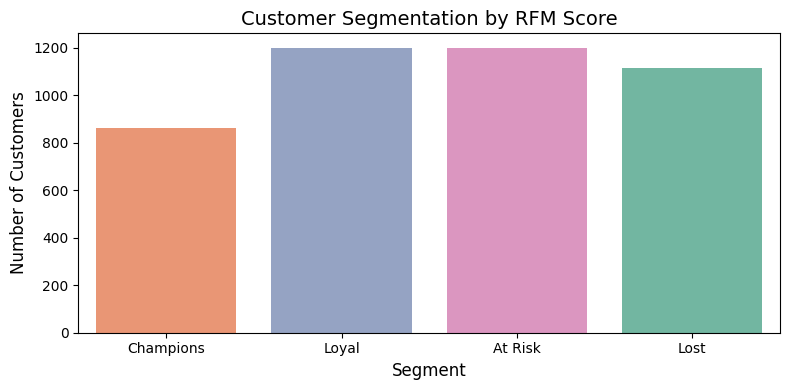

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(
    x='Segment', 
    hue='Segment',  
    data=RFM,
    order=['Champions','Loyal','At Risk','Lost'],
    palette="Set2",
    legend=False       
)

plt.title('Customer Segmentation by RFM Score', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

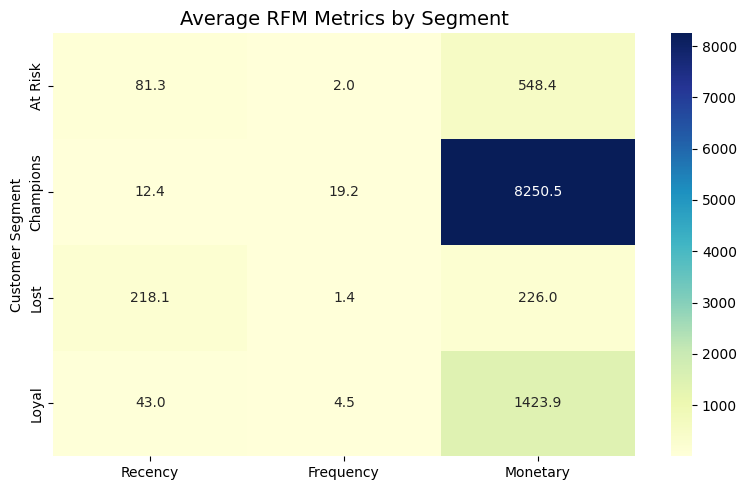

In [29]:
plt.figure(figsize=(8,5))
# Calculate average values per segment
rfm_heatmap_data = RFM.groupby("Segment")[["Recency","Frequency","Monetary"]].mean()

sns.heatmap(
    rfm_heatmap_data,
    annot=True, fmt=".1f",
    cmap="YlGnBu"
)

plt.title("Average RFM Metrics by Segment", fontsize=14)
plt.ylabel("Customer Segment")
plt.tight_layout()
plt.show()

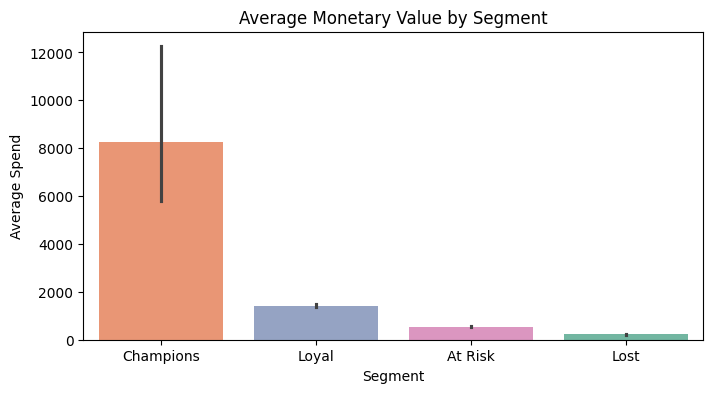

In [30]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x="Segment",
    y="Monetary",
    hue="Segment",       
    legend=False,         
    data=RFM,
    estimator="mean",
    order=['Champions', 'Loyal', 'At Risk', 'Lost'],
    palette="Set2"
)

plt.title("Average Monetary Value by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Spend")
plt.show()

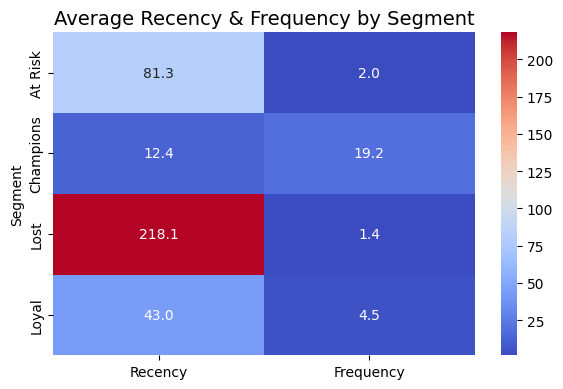

In [31]:
heatmap_data = RFM.groupby("Segment")[["Recency","Frequency"]].mean()
plt.figure(figsize=(6,4))
sns.heatmap(
    heatmap_data,
    annot=True, fmt=".1f",
    cmap="coolwarm"  # red = worse, green = better
)
plt.title("Average Recency & Frequency by Segment", fontsize=14)
plt.ylabel("Segment")
plt.tight_layout()
plt.show()

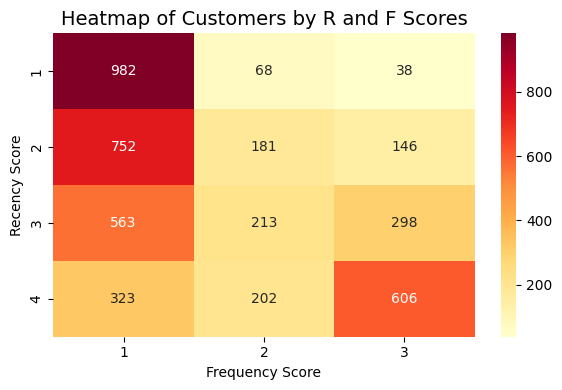

In [32]:
rfm_pivot = RFM.pivot_table(
    index="R_Score",
    columns="F_Score",
    values="M_Score",
    aggfunc="count"
)

plt.figure(figsize=(6,4))
sns.heatmap(rfm_pivot, annot=True, cmap="YlOrRd", fmt=".0f")
plt.title("Heatmap of Customers by R and F Scores", fontsize=14)
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.tight_layout()
plt.show()

# ***Marketing Ideas Suggestion***

In [33]:
# Marketing Ideas for Each RFM Segment

from IPython.display import display, Markdown

marketing_ideas = """
# 📢 Marketing Ideas by RFM Segment

| **Segment** | **Who They Are** | **Goal** | **Marketing Ideas** |
|-------------|----------------|---------|--------------------|
| **Champions** 🏆 | Recent buyers, frequent shoppers, high spenders | Keep them happy and feeling special | - Early access to new products <br> - VIP loyalty programs <br> - Personalized thank-you emails <br> - Invite to exclusive sales or webinars |
| **Loyal** ❤️ | Buy often but may spend less per order | Strengthen relationship, encourage bigger spend | - Tiered loyalty rewards <br> - Free shipping above a certain amount <br> - Recommend products based on past purchases <br> - “Bundle & Save” promotions |
| **At Risk** ⚠️ | Used to buy but haven’t in a while | Re-engage and prevent churn | - Limited-time discount (“We miss you!”) <br> - Win-back email campaigns <br> - Offer store credit or points for coming back <br> - Send personalized reminders of products they liked |
| **Lost** ❌ | Very old customers, no recent purchases | Learn why they left, maybe recover them | - Special one-time comeback offer <br> - Short survey (“What went wrong?”) <br> - Retargeting ads with best sellers <br> - If unresponsive, remove from active list to save cost |
"""

display(Markdown(marketing_ideas))


# 📢 Marketing Ideas by RFM Segment

| **Segment** | **Who They Are** | **Goal** | **Marketing Ideas** |
|-------------|----------------|---------|--------------------|
| **Champions** 🏆 | Recent buyers, frequent shoppers, high spenders | Keep them happy and feeling special | - Early access to new products <br> - VIP loyalty programs <br> - Personalized thank-you emails <br> - Invite to exclusive sales or webinars |
| **Loyal** ❤️ | Buy often but may spend less per order | Strengthen relationship, encourage bigger spend | - Tiered loyalty rewards <br> - Free shipping above a certain amount <br> - Recommend products based on past purchases <br> - “Bundle & Save” promotions |
| **At Risk** ⚠️ | Used to buy but haven’t in a while | Re-engage and prevent churn | - Limited-time discount (“We miss you!”) <br> - Win-back email campaigns <br> - Offer store credit or points for coming back <br> - Send personalized reminders of products they liked |
| **Lost** ❌ | Very old customers, no recent purchases | Learn why they left, maybe recover them | - Special one-time comeback offer <br> - Short survey (“What went wrong?”) <br> - Retargeting ads with best sellers <br> - If unresponsive, remove from active list to save cost |
